# Introduction:

The analysis delves into the pervasive issue of patient no-show appointments in medical practice, aiming to understand its prevalence, impact, and underlying factors while proposing strategies for mitigation. No-show appointments disrupt healthcare workflow, causing financial losses and compromising patient care continuity. Factors contributing to no-shows include demographics, socioeconomic status, appointment characteristics, patient behavior, and systemic barriers. Technological solutions like appointment reminders and telehealth, coupled with effective communication strategies, offer promise in reducing no-show rates. Understanding the financial implications and optimizing resource allocation are crucial for addressing this challenge. The analysis provides evidence-based recommendations to enhance appointment management, streamline healthcare delivery, and improve patient satisfaction.

# Dataset Descripton:

We have a csv file contain the data we are going to analyze.

In [4]:
# import statements for all of the packages that we plan to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling:

In this section of the report we will load in the data, check for cleanliness, anc then trim and clean dataset for analysis.

***

In [5]:
# Load data and print out a few lines. Perfor operations to inspect data types and look for instances of missing or passibly errant data.
data = pd.read_csv("D:/newai/Data Analysis Project/Medical Appointment/KaggleV2-May-2016.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# Exploring the shape of data.
data.shape

(110527, 14)

In [7]:
# Check for dublications.
data.duplicated().sum()

0

In [8]:
# Check the number of unique values.
data['PatientId'].nunique()

62299

In [9]:
# Check the number of dublicated patients Ids.
data['PatientId'].duplicated().sum()

48228

In [10]:
# Check the number of dublicated patients Ids and No-show to check if there were patients Ids dublicated but differ in the No-show status.
data.duplicated(['PatientId', 'No-show']).sum()

38710

There are 38710 patients Ids have the same status of showing or no. we will remove them in the cleaning data stage.

***

In [11]:
# Inspection for missing values or any issue to be handeled.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [12]:
# Getting same informations about out data.
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# Identifying the row index of -1 value for the age.
mask = data.query('Age == -1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


# Data Cleaning

In [14]:
# Removeing the -1 value for age.
data.drop(index = 99832, inplace=True)

In [15]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:
# Correction of columns names.
data.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)
data.rename(columns={'No-show': 'No_show'}, inplace=True)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# Removeing duplicated Ids with duplicated showing status, leaving the duplicated Ids if they differ in the showing status as the same patient may have several appointments, attend same and absent from others.
data.drop_duplicates(['PatientId', 'No_show'], inplace=True)
data.shape

(71816, 14)

In [18]:
# Removing unnecessary data
data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
data.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data wrangling summary:
After gathering the data from the csv file we explored the first few rows of the dataset to the is general properities, then we showed the dimensions of our data, then we checked if there were any duplicated appointments, then explored if there was duplicated patients Ids and removed them , then we turned to data informations like data types and if there is any missing data to handle, then we saw some figures about our data like (min, max, mean, etc), and finally we cleaned our data by correcting the column names and dropping the unnecessary information.







# Exploratory Data Analysis
Now that we have trimmed and cleaned data. ready to move on to exploration, computing statistics and creating visualization with the goa of addressing the research questions that you posed in the introduction section.

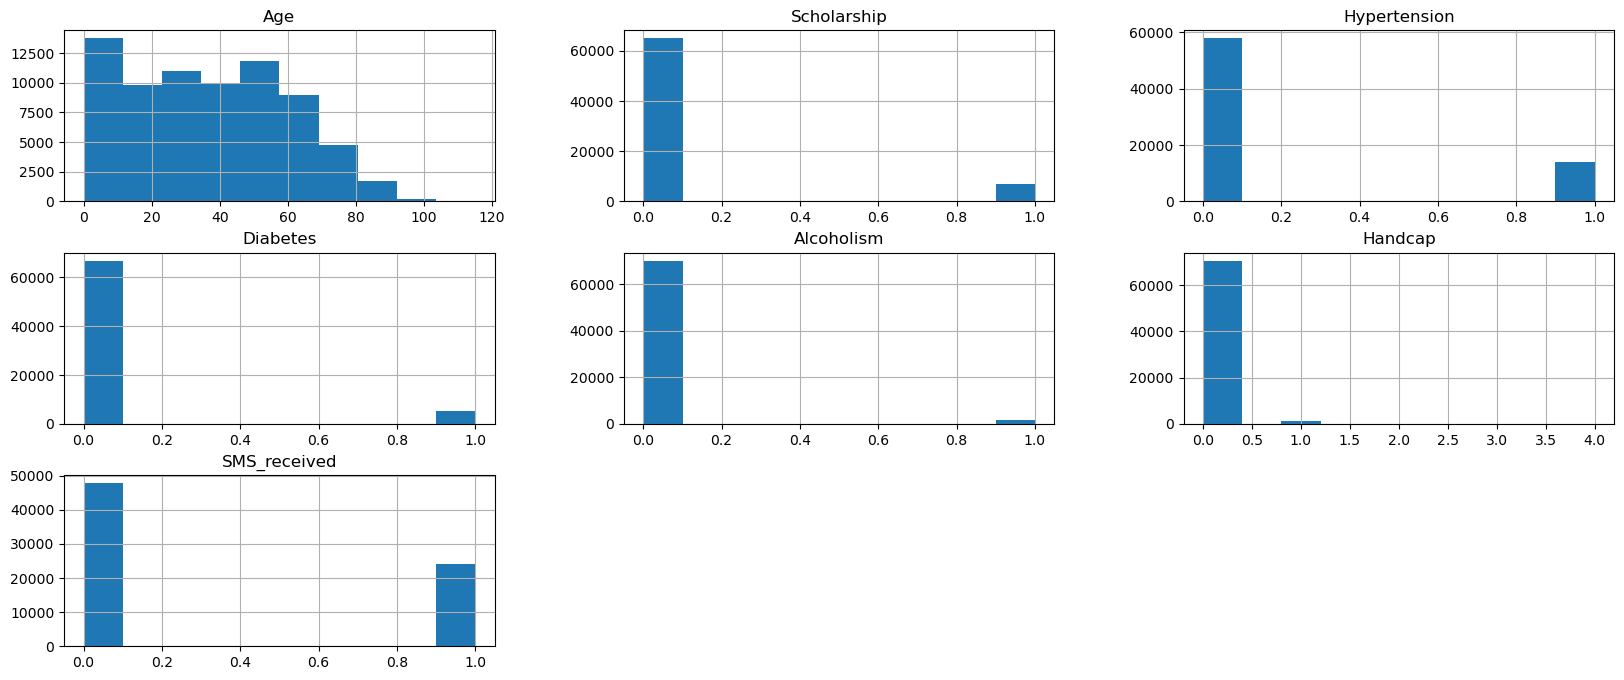

In [19]:
# General look.
data.hist(figsize=(20,8));

In [20]:
# Dividing the patients to 2 groups acc to showing or not then exploreing them.
show = data[data['No_show'] == 'No']
noshow = data[data['No_show'] == 'Yes']

show.count(), noshow.count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [21]:
show = show.drop(columns=['Gender', 'Neighbourhood', 'No_show'], axis=1)
noshow = noshow.drop(columns=['Gender', 'Neighbourhood', 'No_show'], axis=1)
show.mean(), noshow.mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

# Investigation for the influencing factors on the attend rate

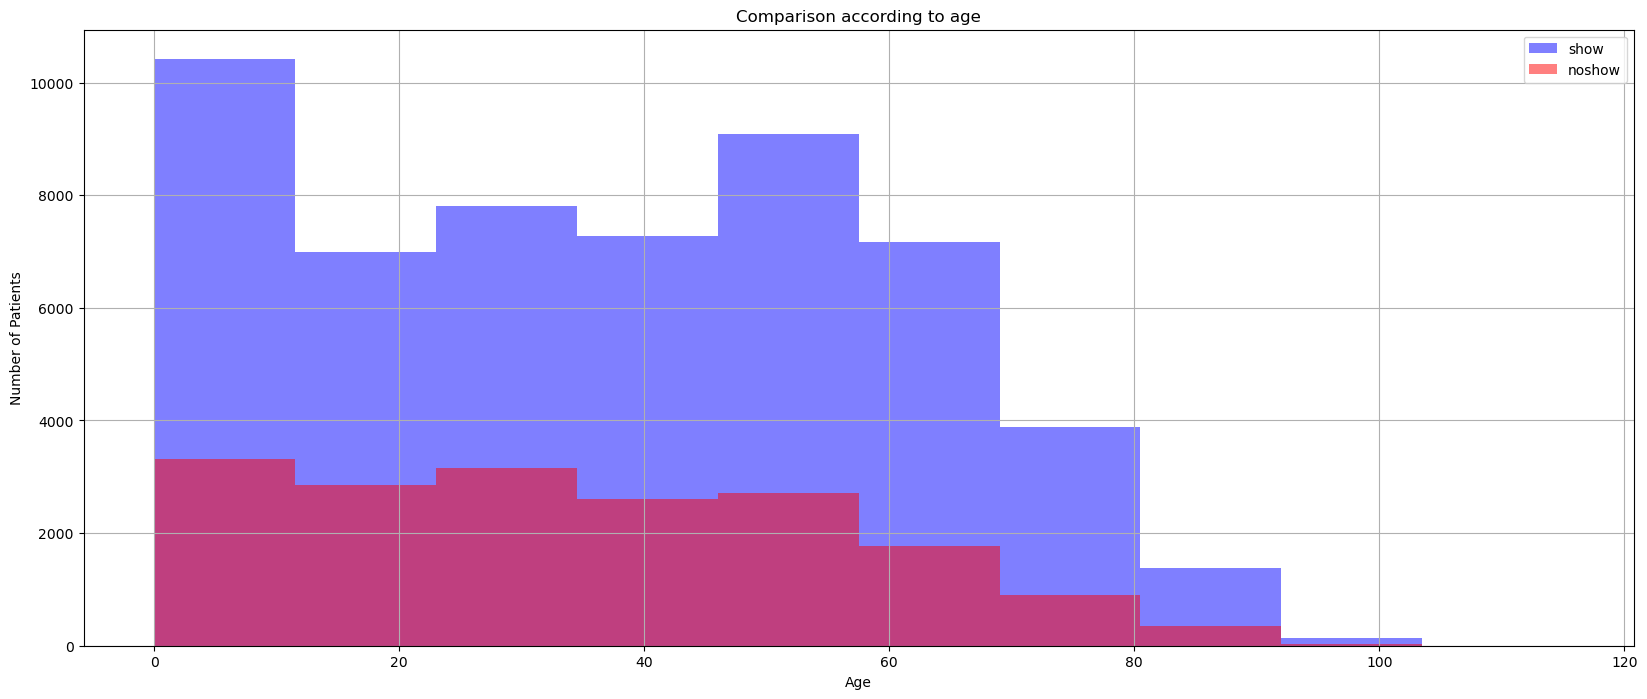

In [22]:
# Does age affect the attendance ?
def attendance(data, col_name, attended, absent):
    plt.figure(figsize=(20,8))
    data[col_name][attended].hist(alpha=0.5, bins=10, color='blue', label='show')
    data[col_name][absent].hist(alpha=0.5, bins=10, color='red', label='noshow')
    plt.legend()
    plt.title('Comparison according to age')
    plt.xlabel('Age')
    plt.ylabel('Number of Patients')
    plt.show()

attendance(data, 'Age', data['No_show'] == 'No', data['No_show'] == 'Yes')


Text(0, 0.5, 'mean age')

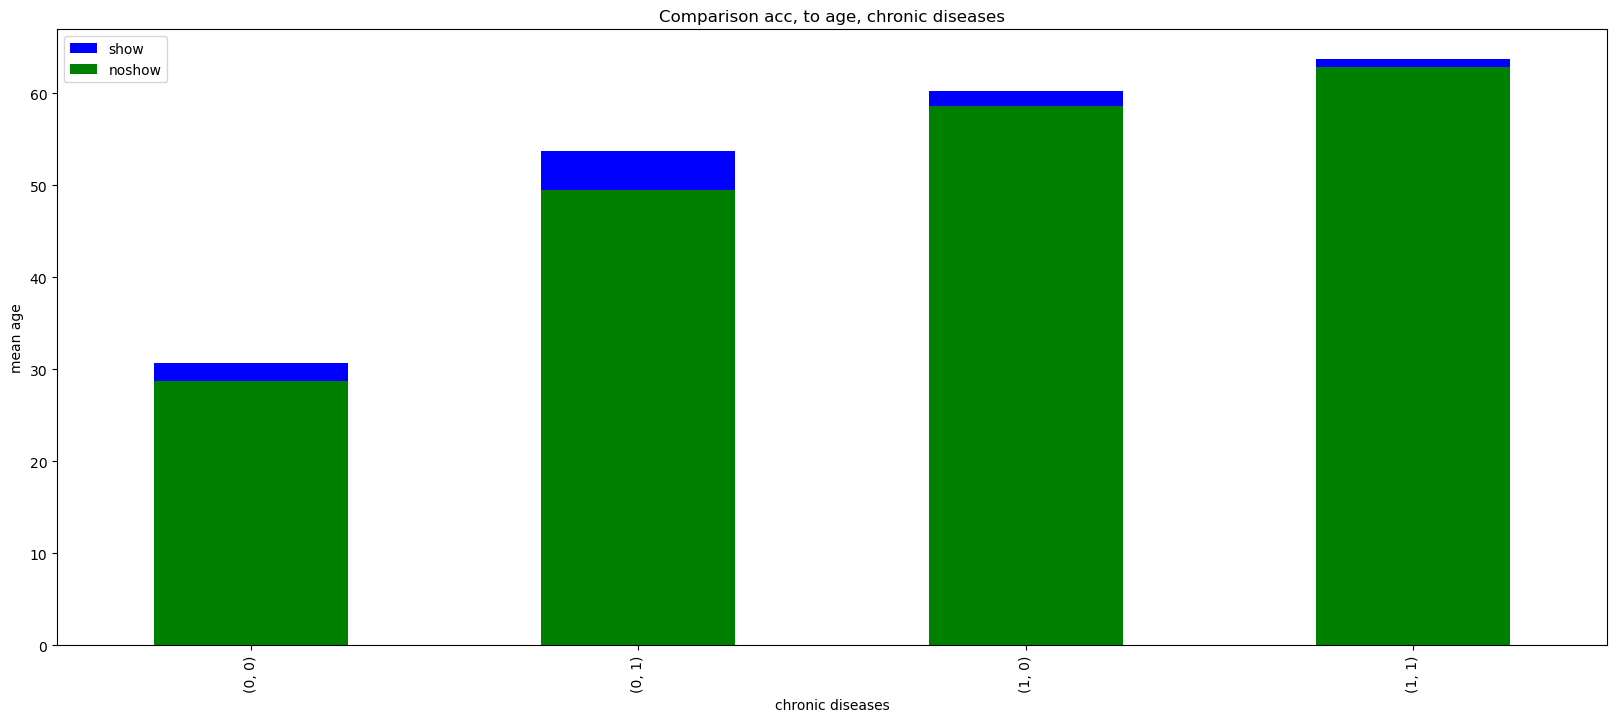

In [23]:
# Does age and chraic aiseases affect the attendance togender ?
plt.figure(figsize=(20,8))
show.groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='blue', label='show')
noshow.groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar', color='green', label='noshow')
plt.legend()
plt.title('Comparison acc, to age, chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')

In [24]:
show.groupby(['Hypertension', 'Diabetes']).mean()['Age'], noshow.groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

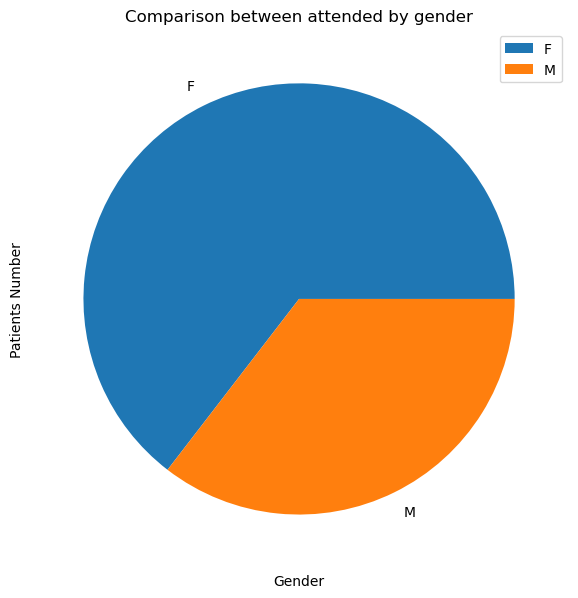

In [45]:
# what is the percentage of sexes attending ?
def attendance(data, col_name):
    plt.figure(figsize=(15,7))
    data[col_name][data['No_show'] == 'No'].value_counts(normalize=True).plot(kind='pie', label='show')
    plt.legend()
    plt.title('Comparison between attended by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
attendance(data, 'Gender')

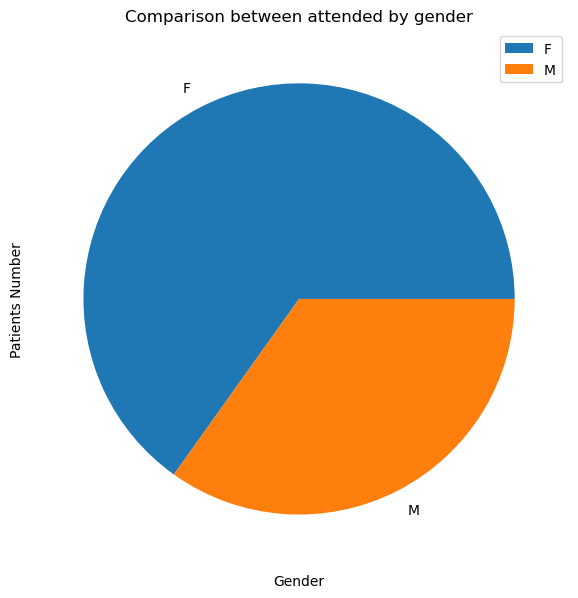

In [47]:
# what is the percentage of sexes abesnt ?
def attendance(data, col_name):
    plt.figure(figsize=(15,7))
    data[col_name][data['No_show'] == 'Yes'].value_counts(normalize=True).plot(kind='pie', label='show')
    plt.legend()
    plt.title('Comparison between attended by gender')
    plt.xlabel('Gender')
    plt.ylabel('Patients Number')
attendance(data, 'Gender')

Text(0, 0.5, 'Mean age')

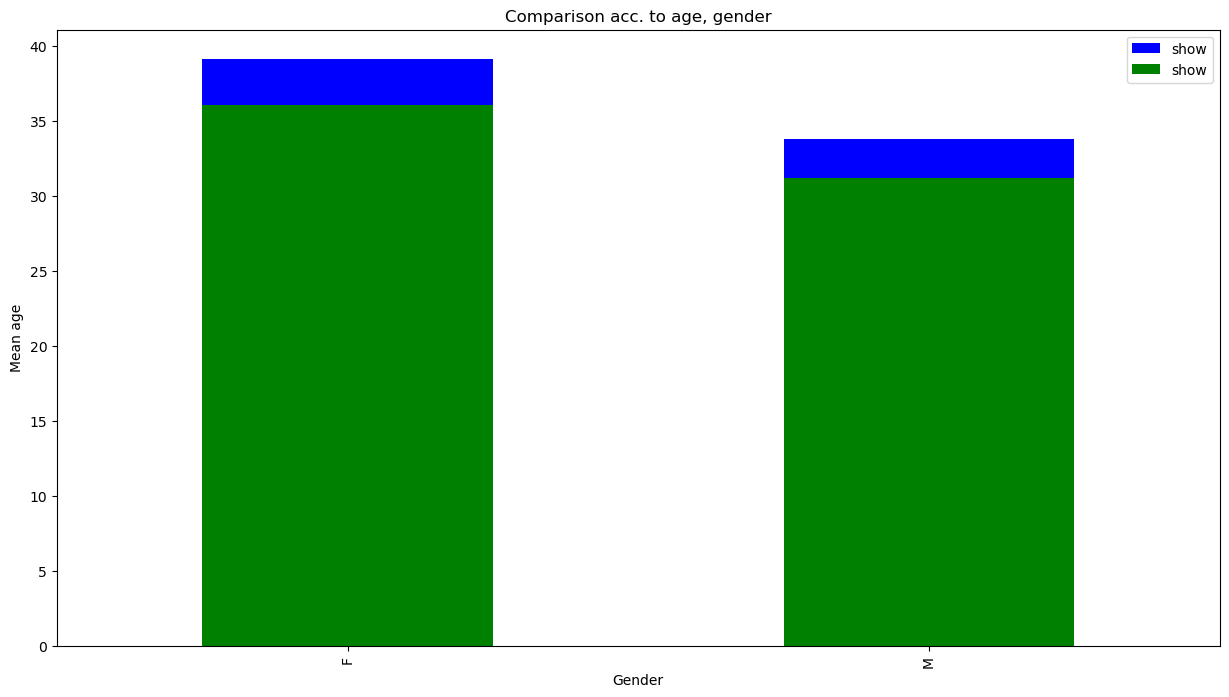

In [53]:
# Does age chonic gender affect the attendence together(check by gender mean age)
plt.figure(figsize=(15,8))
data[data['No_show'] == 'No'].groupby('Gender').Age.mean().plot(kind='bar', color='blue', label='show')
data[data['No_show'] == 'Yes'].groupby('Gender').Age.mean().plot(kind='bar', color='green', label='noshow')
plt.legend()
plt.title('Comparison acc. to age, gender')
plt.xlabel('Gender')
plt.ylabel('Mean age')

In [54]:
data[data['No_show'] == 'No'].groupby('Gender').Age.mean(), data[data['No_show'] == 'Yes'].groupby('Gender').Age.mean()

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64,
 Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

In [55]:
data[data['No_show'] == 'No'].groupby('Gender').Age.median(), data[data['No_show'] == 'Yes'].groupby('Gender').Age.median()

(Gender
 F    39.0
 M    32.0
 Name: Age, dtype: float64,
 Gender
 F    34.0
 M    29.0
 Name: Age, dtype: float64)

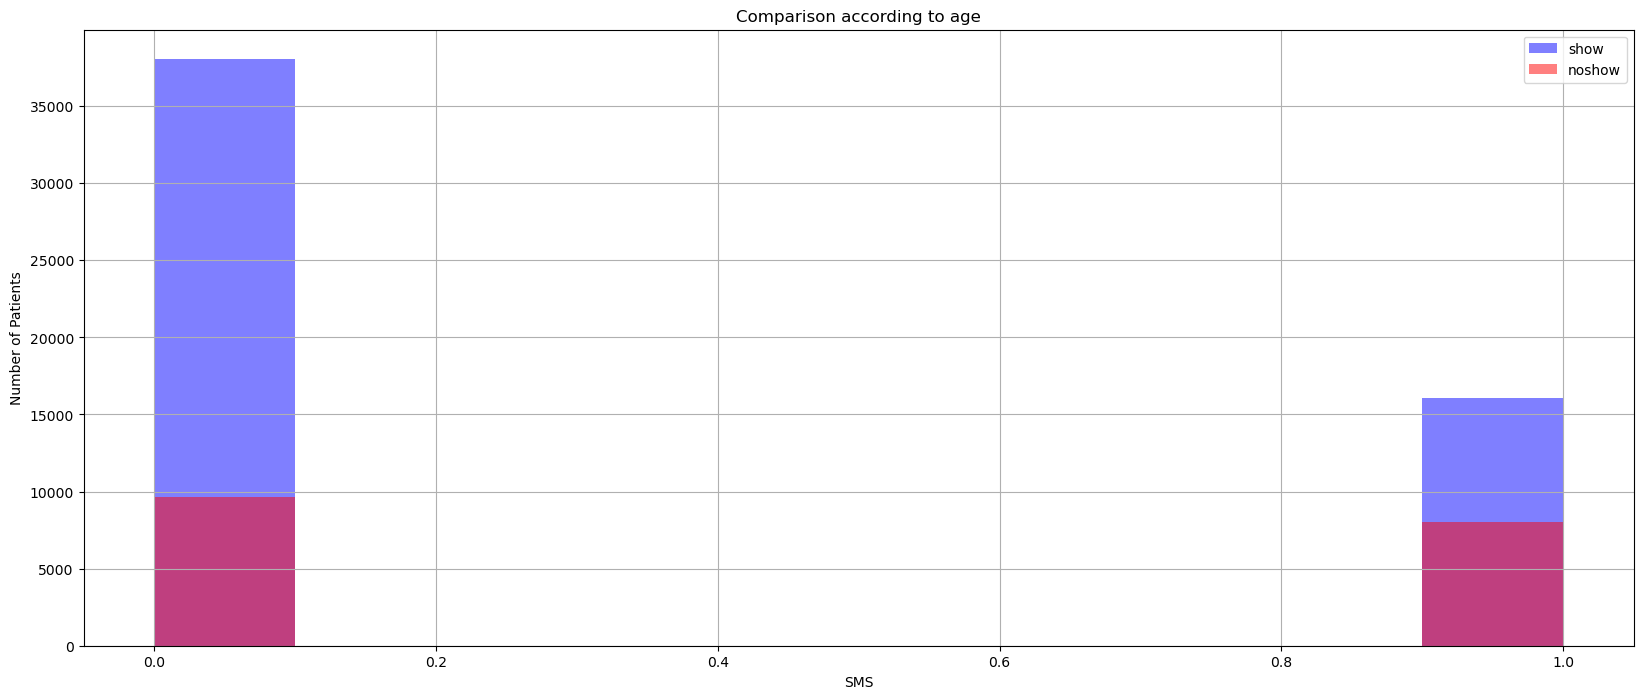

In [56]:
# Does receiving SMS affect the attendence ?
# Does age affect the attendance ?
def attendance(data, col_name, attended, absent):
    plt.figure(figsize=(20,8))
    data[col_name][attended].hist(alpha=0.5, bins=10, color='blue', label='show')
    data[col_name][absent].hist(alpha=0.5, bins=10, color='red', label='noshow')
    plt.legend()
    plt.title('Comparison according to age')
    plt.xlabel('SMS')
    plt.ylabel('Number of Patients')
    plt.show()

attendance(data, 'SMS_received', data['No_show'] == 'No', data['No_show'] == 'Yes')

Number of showing patients without receiving SMS is greater than showing patients patients with receiving SMS, which means that we need to revisit our SMS campaign

Text(0, 0.5, 'Patients Number')

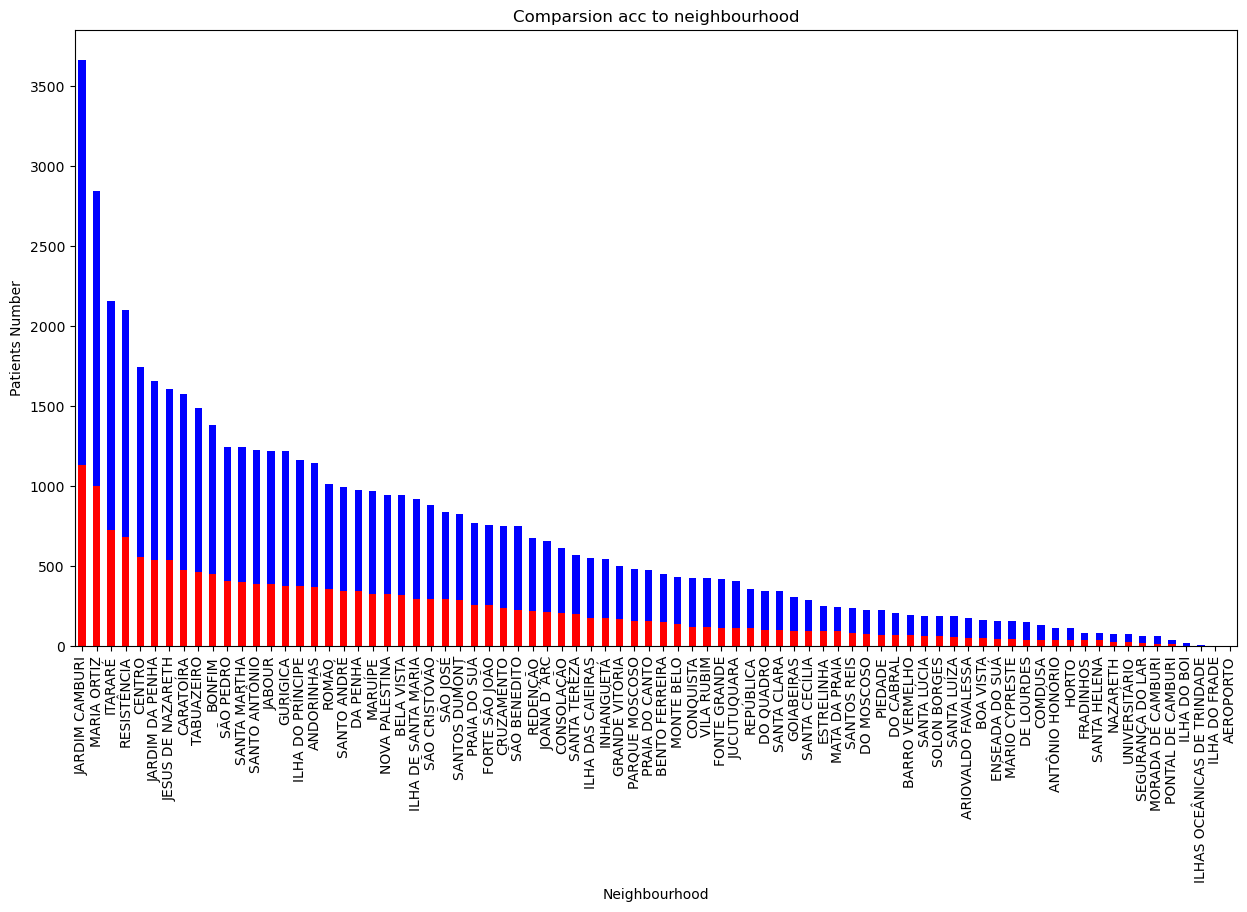

In [66]:
# Does neighbourhood  affect the attendance ?
plt.figure(figsize=(15,8))
data.Neighbourhood[data['No_show'] == 'No'].value_counts().plot(kind='bar', color='blue', label='show')
data.Neighbourhood[data['No_show'] == 'Yes'].value_counts().plot(kind='bar', color='red', label='noshow')
plt.legend()
plt.title('Comparsion acc to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number')

Text(0, 0.5, 'Patients Number')

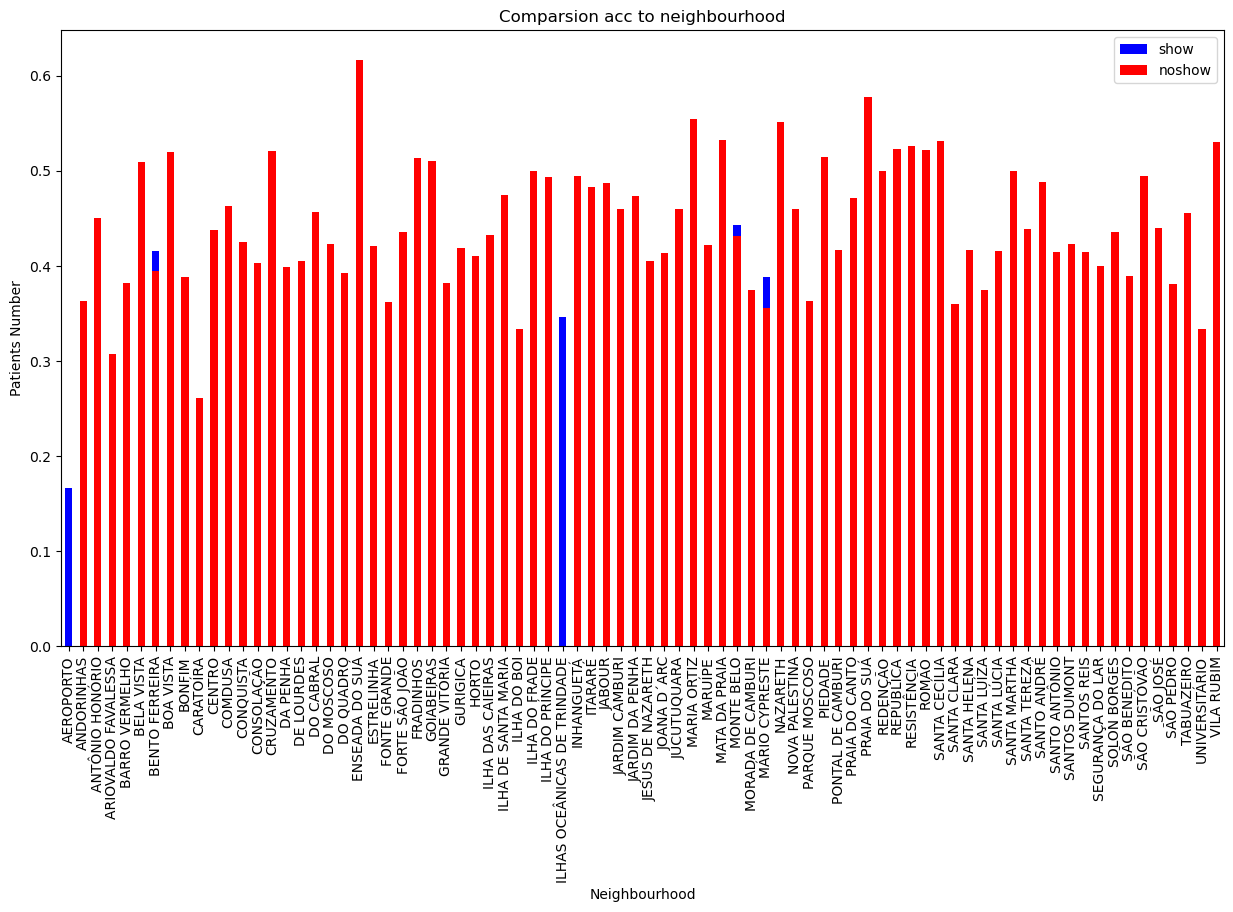

In [72]:
plt.figure(figsize=(15,8))
data[data['No_show'] == 'No'].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='blue', label='show')
data[data['No_show'] == 'Yes'].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar', color='red', label='noshow')
plt.legend()
plt.title('Comparsion acc to neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number')

Text(0, 0.5, 'Mean age')

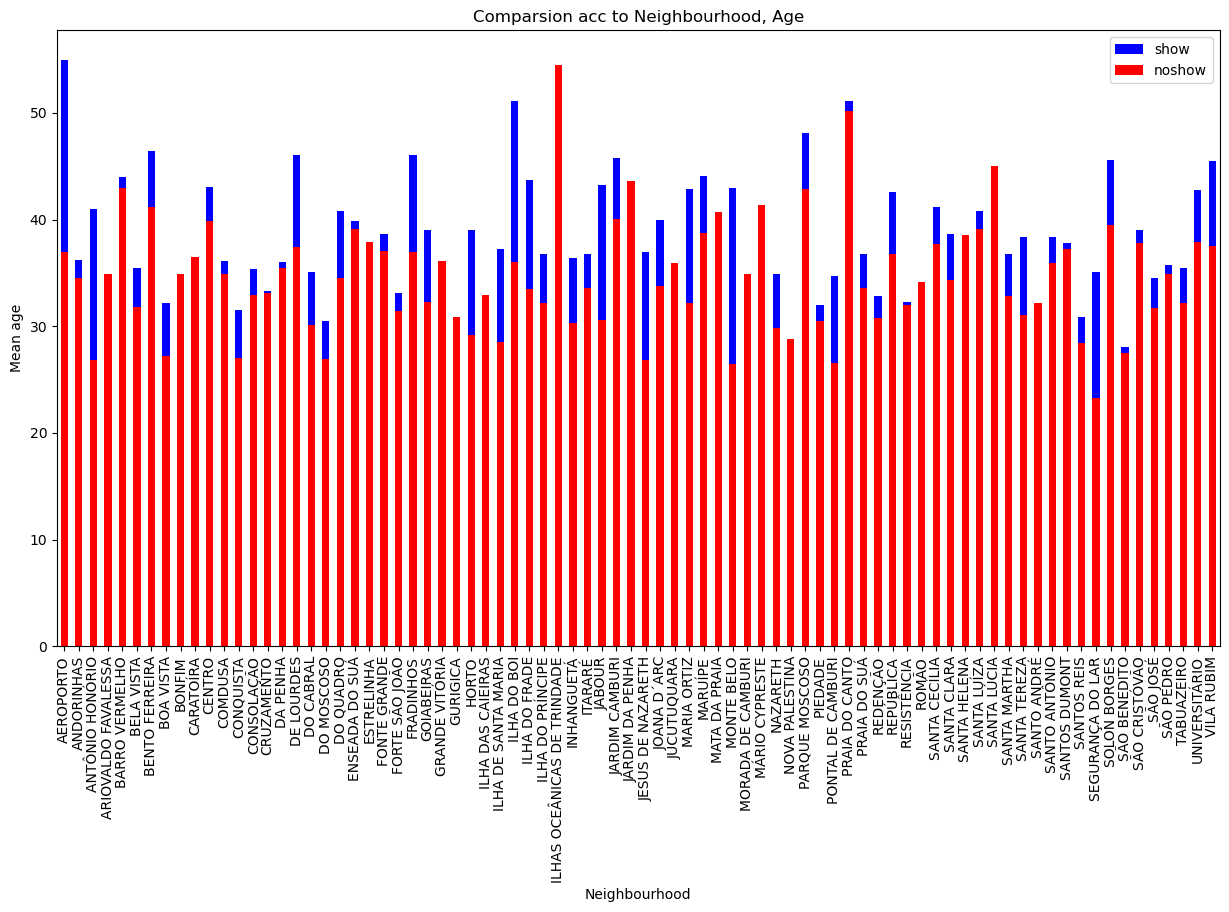

In [73]:
plt.figure(figsize=(15,8))
data[data['No_show'] == 'No'].groupby('Neighbourhood').Age.mean().plot(kind='bar', color='blue', label='show')
data[data['No_show'] == 'Yes'].groupby('Neighbourhood').Age.mean().plot(kind='bar', color='red', label='noshow')
plt.legend()
plt.title('Comparsion acc to Neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean age')

# Conclusion
Neighbourhood has a great effect on attentance or not, Jardim camburi has the greatest number of patients and also has the greatest showing rate.

Number of showing patients from specific neighbourhood affected by receiving SMS and ages.

Age has a clear influence on the showing rate ages from0:8 are the most showing (parents taking care of their kids) then from45:55 and the least attending are whom above 65 years old.

Number of showing patients without receiving SMS is grater then showing patients with receiving SMS, which means that we need to revisit our SMS
compaghin.

# Limitations
No clear correiation between showing and gender, chronic diseases, enrollement in the weifare program.